## **1. Definicion de objetivo**

¿Como podriamos estimar que genero de juegos tiene mayores chances de lograr un alto nivel de ventas por region?<br>
¿Podremos hacer lo mismo, pero con las distintas plataformas?


## **2. Contexto comercial**

Una nueva empresa enfocada en el desarrollo de videojuegos, necesita saber que rumbo tomar a la hora del desarrollo de los mismos. Para eso necesita saber cuales son los generos de videojuegos que han tenido mayores volumenes de venta, y en que zona tuvieron mas exito. Tienen parametros como: genero, plataforma, puntaje dado por el publico, cantidad de usuarios, etc.
## **3. Problema comercial**<br>
La tarea es usar los datos disponibles y proporcionar visualizaciones que respondan a las preguntas que tiene la empresa:<br>
¿Cuales son los generos que han tenido  mas exito a nivel mundial, en terminos de ventas?<br>
Estos patrones, ¿se repiten en todas las regiones, o cada region tiene preferencias distintas?<br>
¿Se podria hacer lo mismo, pero con las plataformas?<br>
¿Tendra algun efecto en el volumen de ventas globales, el puntaje de critica?<br>

## **4. Contexto analitico**

Se le proporciona un archivo .CSV que contiene detalles sobre los juegos con datos de: nombre del juego, plataforma, fecha de lanzamiento, genero, ventas tanto a nivel global como regional (3 zonas geograficas), etc. Debe realizar las siguientes tareas con los datos:<br>
Leer, transformar y preparar datos para su visualización.<br>
Realizar análisis y construir visualizaciones de los datos para intentar contestar a las preguntas.


### Datos - Columnas de interes<br>
**Platform**: La plataforma para la que fue desarrollado el juego<br>
**Genre**: El genero al que corresponde el juego<br>
**Global_Sales**: El putnaje de ventas a nivel global<br>
**Eu_Sales**: El puntaje de ventas en la region de Europa<br>
**Na_Sales**: El puntaje de ventas en la region de NorteAmerica<br>
**JP_Sales**: El puntaje de ventas en la region de Japon

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [2]:
file_data = 'VideoGamesSales.csv'
df = pd.read_csv (file_data, sep=',')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


En este dataset tenemos datos de aproximadamente 17 mil juegos. Su año de lanzamiento, plataforma en la que fue lanzado y su genero. Tambien tenemos el puntaje sobre el volumen de ventas en las regiones mas relevante (NA, EU y Japon), como tambien asi, su puntaje global. Tenemos el puntaje que les ha dado la pagina Metacritic, con un maximo de 100 puntos, y el puntaje dados por los usuarios, con un tope de 10 puntos. Podria utilizarse para que los desarrolladores puedan tener una idea sobre que direccion tomar, a la hora de lanzar algun producto a su mercado. Ya sea que genero elegir, que plataforma es la mas elegida para ese genero, o en que region basar su marketing de ventas.

In [3]:
sum_df = df.groupby(['Genre'])['Global_Sales'].sum()
sum_df

Genre
Action          1745.27
Adventure        237.69
Fighting         447.48
Misc             803.18
Platform         828.08
Puzzle           243.02
Racing           728.90
Role-Playing     934.40
Shooter         1052.94
Simulation       390.42
Sports          1332.00
Strategy         174.50
Name: Global_Sales, dtype: float64

In [4]:
df_n=df[['Genre','NA_Sales','EU_Sales','JP_Sales']].groupby(by=['Genre']).sum().reset_index()
df_n.head()

,Genre,NA_Sales,EU_Sales,JP_Sales
0,Action,879.01,519.13,161.44
1,Adventure,105.26,63.54,52.30
2,Fighting,223.36,100.33,87.48
3,Misc,407.27,212.74,108.11
4,Platform,445.50,200.35,130.83


Text(0.5, 1.0, 'NA sales by genre')

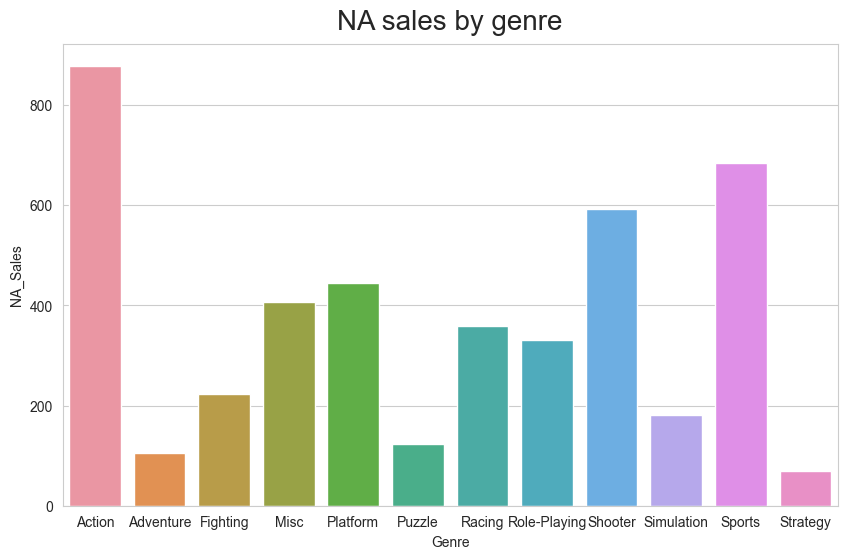

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(y='NA_Sales',x='Genre',data=df_n);
plt.title("NA sales by genre", fontsize=20, verticalalignment='bottom')

Podemos ver como en la region de Norteamerica, los 3 generos mas populares son: Accion, Deportes y Shooter. Mientras que los 3 menos populares son: Puzzle, Aventura y Estrategia. Siguiendo los mismos patrones que teniamos con los datos de ventas a nivel mundial.

Text(0.5, 1.0, 'EU sales by genre')

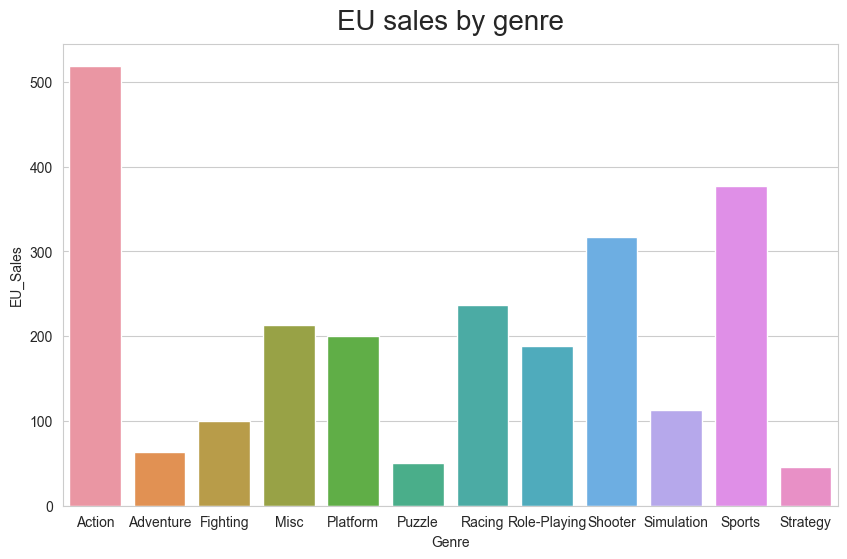

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(y='EU_Sales',x='Genre',data=df_n);
plt.title("EU sales by genre", fontsize=20, verticalalignment='bottom')

En la region de Europa, se repite casi el mismo patron que en Norteamerica. El top 3 y el bottom 3, se conforman por los mismos generos.

Text(0.5, 1.0, 'JP sales by genre')

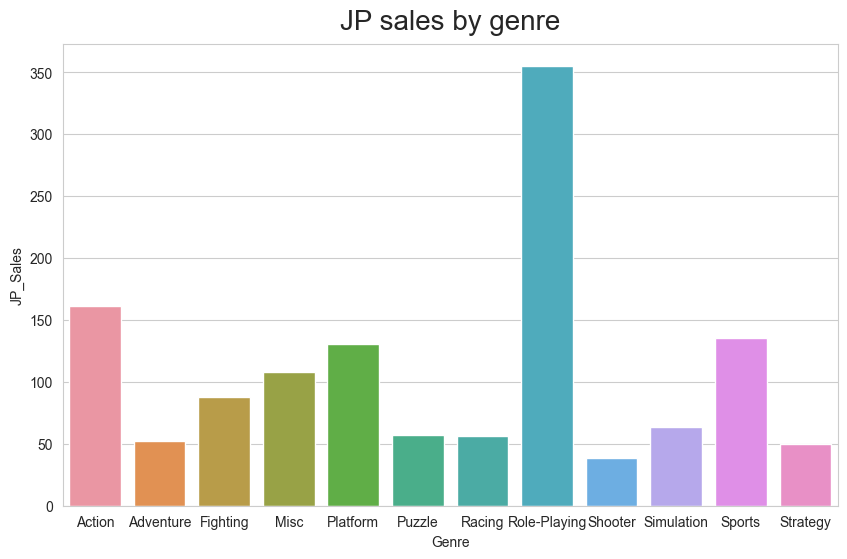

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(y='JP_Sales',x='Genre',data=df_n);
plt.title("JP sales by genre", fontsize=20, verticalalignment='bottom')

Sin embargo en la region de Japon, esto cambia. En el top 3 tenemos las categorias de: RPG, primera por amplia diferencia, Accion y Deportes. Mientras las 3 menos populares, son las mismas que en las otras regiones. 

Quizas las categorias menos populares, puedan deberse al volumen de juegos que tienen, haciendo que no puedan sumar una gran cantidad de ventas. Con esto podriamos decir, que las empresas o desarrolladores que se enfoquen en el desarrollo de juegos de RPG, podrian enfocar su campaña de marketing en la region de Japon, siendo esta la que mas juegos de esta categoria consume.

In [8]:
df1 = df.fillna(0)
df2 = df1.set_index('Name')
df2.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,,,,,,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.0,0.0,0.0,0.0,0,0
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0.0,0.0,0,0


In [9]:
df3 = df2.drop(['Platform', 'Developer', 'Publisher', 'Rating'], axis=1)
df3

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Name,,,,,,,,,,,
Wii Sports,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0
Super Mario Bros.,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,0.0,0.0,0.0,0.0
Mario Kart Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
Wii Sports Resort,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0
Pokemon Red/Pokemon Blue,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Samurai Warriors: Sanada Maru,2016.0,Action,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0
LMA Manager 2007,2006.0,Sports,0.00,0.01,0.00,0.00,0.01,0.0,0.0,0.0,0.0
Haitaka no Psychedelica,2016.0,Adventure,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16719 entries, Wii Sports to Winning Post 8 2016
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  16719 non-null  float64
 1   Genre            16719 non-null  object 
 2   NA_Sales         16719 non-null  float64
 3   EU_Sales         16719 non-null  float64
 4   JP_Sales         16719 non-null  float64
 5   Other_Sales      16719 non-null  float64
 6   Global_Sales     16719 non-null  float64
 7   Critic_Score     16719 non-null  float64
 8   Critic_Count     16719 non-null  float64
 9   User_Score       16719 non-null  float64
 10  User_Count       16719 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.5+ MB


In [11]:
df4 = pd.get_dummies(df3)
df4

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
Name,,,,,,,,,,,,,,,,,,,,,
Wii Sports,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,...,False,False,False,False,False,False,False,False,True,False
Super Mario Bros.,1985.0,29.08,3.58,6.81,0.77,40.24,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
Mario Kart Wii,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,...,False,False,False,False,True,False,False,False,False,False
Wii Sports Resort,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,...,False,False,False,False,False,False,False,False,True,False
Pokemon Red/Pokemon Blue,1996.0,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samurai Warriors: Sanada Maru,2016.0,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
LMA Manager 2007,2006.0,0.00,0.01,0.00,0.00,0.01,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
Haitaka no Psychedelica,2016.0,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [42]:
bosdum1 = pd.DataFrame(df3, columns = df3.columns)
bosdum = pd.DataFrame(df4, columns=df4.columns)
X = bosdum[['Global_Sales']]      
y = bosdum[['Critic_Score']]


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.026008403643839606


Por lo que se puede apreciar en las metricas de R2, el puntaje de criticas, no esta directamente relacionado con las ventas globales de un juego.

In [47]:
X1 = bosdum[['Global_Sales']]      
y1 = bosdum[['User_Count']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2, random_state=1)
lr = LinearRegression()
lr.fit(X1_train,y1_train)
y1_pred = lr.predict(X1_test)

In [48]:
r2 = r2_score(y1_test,y1_pred)
print(r2)

0.06742447898026638


Tampoco esta relacionado al volumen de ventas globales, la variable de conteo de usuarios.